In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from tqdm import *
import sys
# # This on is a path correcting code, which is used to find the path of qusim.
# sys.path.append('../..')

import qusim.System.arb_qubit_system as aqs
# Some useful tools
import qusim.Instruments.tools as tools

# Some intrinsic plotting function
import qusim.DataPlot.plot_lib as pl

# Print the full output
np.set_printoptions(threshold=sys.maxsize)

# auto reload
%load_ext autoreload
%autoreload 2 

# variable name -> string
def var_name2str(variable):
    def nested_var_name2str(value):
        if isinstance(value, list):
            return [nested_var_name2str(item) for item in value]
        else:
            for name in globals():
                if eval(name) == value:
                    return name
            return str(value)
    return nested_var_name2str(variable)

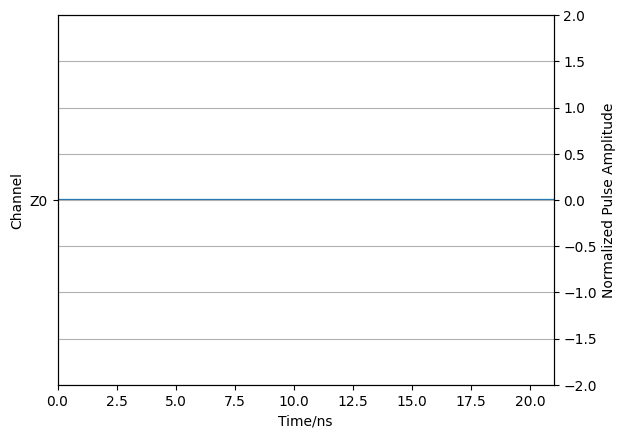

0

In [8]:
freq_list = [
    [0, 6.3]
]

driving_list = [
    {
        "W01": 1, 
    }
]

extra_list = [
    {
        "v01": 1
    }
]

bias_list = [ # Default, Z00 = 0
    {
        "Z00": 0,
        "Z11": 1
    }
]
_system_arb = aqs.arb_qubit_system(freq_list, extra_list=extra_list, driving_list= driving_list, bias_list= bias_list)

state_0, E_0, index_0 = _system_arb.get_eigenstates_energy((0,))
state_1, E_1, index_1 = _system_arb.get_eigenstates_energy((1,))

tg_half_pi = 10; amp_half_pi = 1/(2*tg_half_pi)
tau_wait = 1; t_total = 2*tg_half_pi + tau_wait

simulation_option = {
    "simulation_time": t_total, # Unit in ns
    "simulation_step": int(t_total)*100,
    "initial_state": [state_0, state_1] # Do multiple simulation
}

# noise_chan1 = [
#     {
#     'type': 'gaussian',
#     'switch': 'on',
#     'mean': 0,
#     'std': 1/(85),
#     }
# ]

noise_chan1 = [
    {
    'type': '1/f',
    'switch': 'on',
    'scale': 0.1,
    'alpha': 1.2,
    }
]

pulse_sequence = [
    # {
    #     'pulse_index': 0,
    #     'type': "XY", # 'XY' or 'Z'
    #     'pulse_shape': "cosine", # See PulseGen/pulse_shape.py
    #     't_delay': 0, # unit in ns
    #     't_width': tg_half_pi, # unit in ns
    #     't_plateau': 0, # unit in ns
    #     'freq': E_1 - E_0, # unit in GHz; Z pulse does not use it
    #     'pulse_detuning': 0,
    #     'phase': 0, # unit in rad;
    #     'amplitude': amp_half_pi, # XY: Rabi freq; Z: biased frequency
    #     'q_index': 0 # 0, 1, 2
    # },
    # {
    #     'pulse_index': 1,
    #     'type': "XY", # 'XY' or 'Z'
    #     'pulse_shape': "cosine", # See PulseGen/pulse_shape.py
    #     't_delay': tau_wait+tg_half_pi, # unit in ns
    #     't_width': tg_half_pi, # unit in ns
    #     't_plateau': 0, # unit in ns
    #     'freq': E_1 - E_0, # unit in GHz; Z pulse does not use it
    #     'pulse_detuning': 0,
    #     'phase': 0, # unit in rad;
    #     'amplitude': amp_half_pi, # XY: Rabi freq; Z: biased frequency
    #     'q_index': 0 # 0, 1, 2
    # },
    # {
    #     'pulse_index': 2,
    #     'type': "Z", # 'XY' or 'Z'
    #     'pulse_shape': "square", # See PulseGen/pulse_shape.py
    #     't_delay': tg_half_pi, # unit in ns
    #     't_width': tau_wait, # unit in ns
    #     't_plateau': 0, # unit in ns
    #     'freq': 0, # unit in GHz; Z pulse does not use it
    #     'pulse_detuning': 0,
    #     'phase': 0, # unit in rad;
    #     'amplitude': w[0], # XY: Rabi freq; Z: biased frequency
    #     'q_index': 0,
    #     'noise': noise_chan1
    # },
    {
        'pulse_index': 3,
        'type': "Z", # 'XY' or 'Z'
        'pulse_shape': "square", # See PulseGen/pulse_shape.py
        't_delay': 0,#tg_half_pi, # unit in ns
        't_width': t_total, #tau_wait, # unit in ns
        't_plateau': 0, # unit in ns
        'freq': 0, # unit in GHz; Z pulse does not use it
        'pulse_detuning': 0,
        'phase': 0, # unit in rad;
        'amplitude': 0.0001, # XY: Rabi freq; Z: biased frequency
        'q_index': 0,
        # 'noise': noise_chan1
    },
]
pl.plot_pulse_sequence(pulse_sequence, simulation_option)

In [9]:
result_list, angle_list = _system_arb.system_dynamics_mesolve(simulation_option, pulse_sequence)

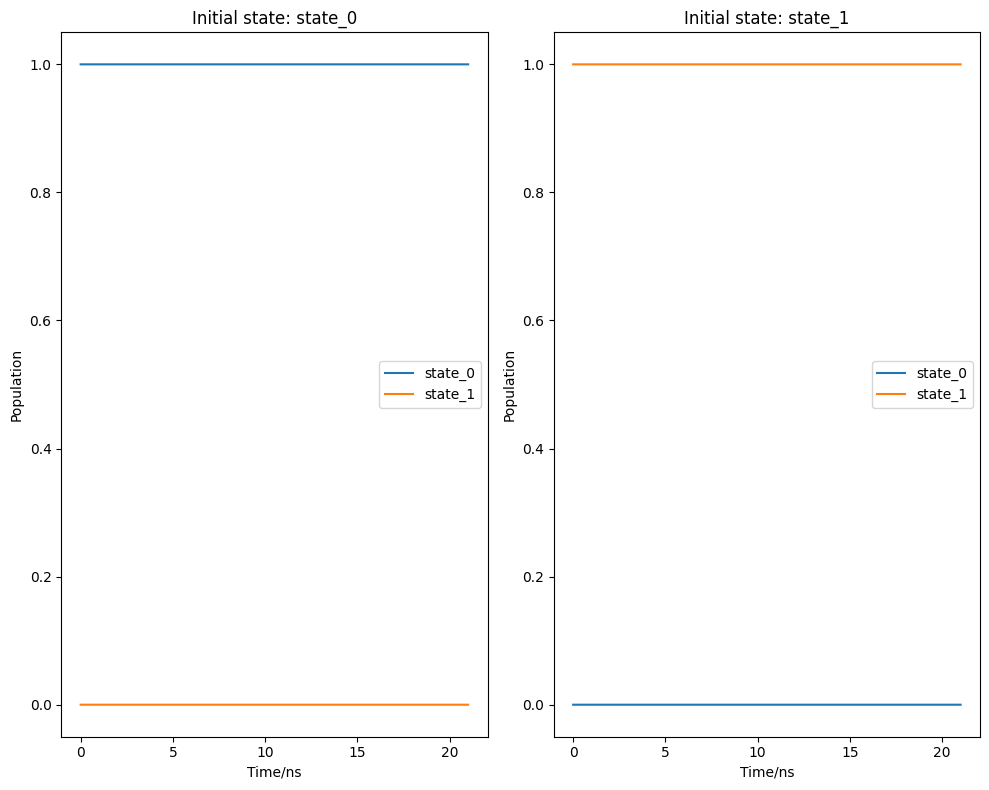

0

In [11]:
# state that you want to plot each simulation
interested_state = [
                    [state_0, state_1],
                    [state_0, state_1],
                    ]
# Convert the variable name to string in order to make legend in the plot
interested_state_label = var_name2str(interested_state)
initial_state_label = var_name2str(simulation_option["initial_state"])
%matplotlib inline
# plot state population evolution
pl.plot_population_evolution(_system_arb, result_list, simulation_option, interested_state, interested_state_label, initial_state_label)